In [5]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Root directories
final_code_dir = Path("final_code_files")
logs_dir = Path("logs")

In [6]:
# List to store results
results = []

# Iterate through each experiment in final_code_files
for experiment_folder in final_code_dir.iterdir():
    if experiment_folder.is_dir():
        experiment_name = experiment_folder.name
        training_exists = (experiment_folder / "final_training_code.py").exists()
        testing_exists = (experiment_folder / "final_testing_code.py").exists()

        # Check corresponding log folder
        corresponding_log_folder = logs_dir / experiment_name
        steps_exist = corresponding_log_folder.exists() and all((corresponding_log_folder / f"STEP{i}").exists() for i in range(1, 11))

        # Count attempts from STEP9 of logs
        step9_path = corresponding_log_folder / "STEP9"
        attempts = len(list(step9_path.glob("train_attempt_*.py"))) if step9_path.exists() else 0

        # Determine status
        if training_exists and testing_exists and steps_exist:
            status = "success"
            issue_type = "none"
        else:
            status = "failure"
            if not training_exists or not testing_exists or attempts>=15:
                issue_type = "code"
            elif not steps_exist:
                issue_type = "concept"
            else:
                issue_type = "unknown"


        results.append({"experiment": experiment_name, "status": status, "attempts": attempts, "issue_type": issue_type})

In [7]:
results

[{'experiment': 'finance_paper_1',
  'status': 'success',
  'attempts': 15,
  'issue_type': 'none'},
 {'experiment': 'finance_paper_2',
  'status': 'failure',
  'attempts': 4,
  'issue_type': 'code'},
 {'experiment': 'saveit_input_02',
  'status': 'success',
  'attempts': 9,
  'issue_type': 'none'},
 {'experiment': 'saveit_input_02_1',
  'status': 'failure',
  'attempts': 2,
  'issue_type': 'concept'},
 {'experiment': 'saveit_input_06_1',
  'status': 'failure',
  'attempts': 2,
  'issue_type': 'code'},
 {'experiment': 'saveit_input_08_1',
  'status': 'success',
  'attempts': 1,
  'issue_type': 'none'},
 {'experiment': 'saveit_input_08_2',
  'status': 'failure',
  'attempts': 1,
  'issue_type': 'code'}]

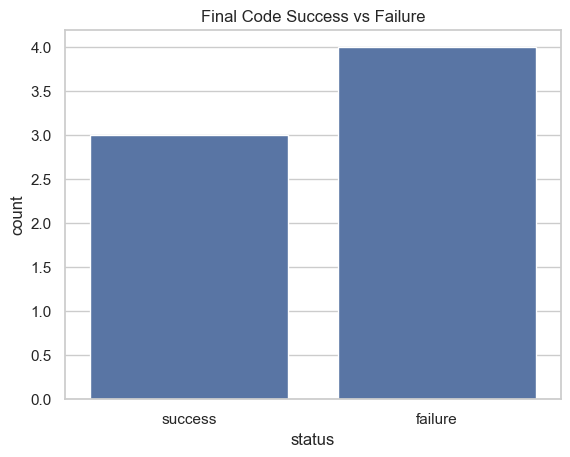

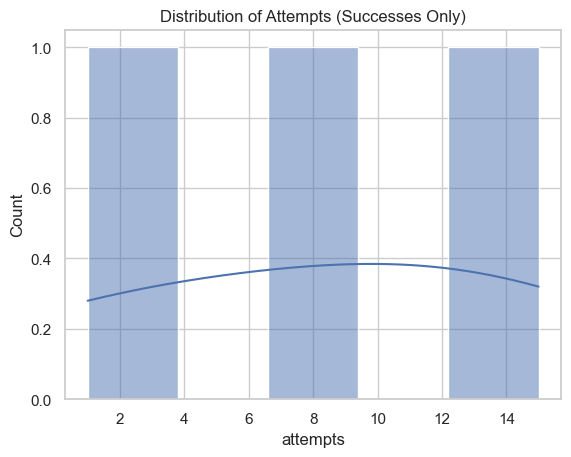

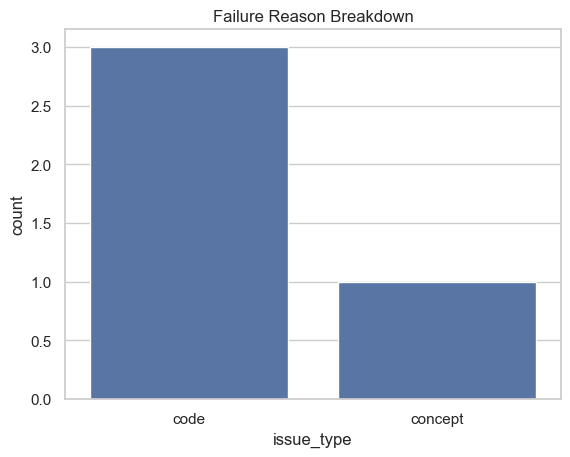

In [8]:
df = pd.DataFrame(results)
df.head()

sns.set(style="whitegrid")

# Success vs Failure
sns.countplot(data=df, x='status')
plt.title("Final Code Success vs Failure")
plt.show()

# Attempts Distribution (Success only)
sns.histplot(data=df[df['status'] == 'success'], x='attempts', bins=5, kde=True)
plt.title("Distribution of Attempts (Successes Only)")
plt.show()

# Failure Reasons
sns.countplot(data=df[df['status'] == 'failure'], x='issue_type')
plt.title("Failure Reason Breakdown")
plt.show()
